![](../images/logo2.png)

# Introduction to Matplotlib

Matplotlib is a Python visualization library producing publication quality figures in a variety of hardcopy formats and interactive environments. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.

# tutorial: http://bit.ly/scipympl19

# Get to know the library!
1. Go to http://bit.ly/mpl_gallery
2. Pick a visualization you'd like to learn how to create
3. Turn to your neighbor & discuss w/ each other why you want to learn to make it
4. Post your images to the slack! 
5. optional: tweet your faves & tag @matplotlib and #scipy2019 ;)

## Getting Help!

During this tutorial, please flag down Hannah, Tom (whoever isn't teaching at the moment) or Kimberly. 

The easiest way to do this is to post in the Scipy2019 #matplotlib slack channel 

__stickies__: Put a sticky note on your laptop. If you've used the flags before, we don't have enough of the orange so in this class all stickies mean please help!

### After the tutorial

To follow up on the material discussed in this tutorial:

__Documentation__:
* https://matplotlib.org/

__Mailing lists__:
* [User](https://mail.python.org/mailman/listinfo/matplotlib-users): matplotlib-users@python.org
* [Announcement](https://mail.python.org/mailman/listinfo/matplotlib-announce): matplotlib-announce@python.org
* [Development](https://mail.python.org/mailman/listinfo/matplotlib-devel): matplotlib-devel@python.org

__Social__:
* twitter: [@matplotlib](https://twitter.com/matplotlib)
* gitter chat: https://gitter.im/matplotlib/matplotlib

## What do you need for this tutorial?
Installation instructions can be found [here](installation.md). We will be using __Python 3__.  We will also be using the [Pandas](https://pandas.pydata.org/) data analysis and the [NumPy](https://www.numpy.org/) numerical analysis libraries to load in and process much of the data that we are trying to visualize. 

### Import libraries and check versions
To use a library in Python, we need to first import it. In this code block, we also print the version of the libraries we are importing for reproducibility. Sometimes minor changes in the libraries between versions will cause code to behave unexpectedly - for example the images you produce may look slightly different from the ones in this tutorial. We are using Python [format strings](https://docs.python.org/3.4/library/string.html#string-formatting) for the printing.


In [2]:
import matplotlib
print(f'Matplotlib: {matplotlib.__version__}')
import matplotlib.pyplot as plt # load in matplotlib plotting tools
import pandas as pd # rename as pd by convention
print(f"pandas: {pd.__version__}")
import numpy as np  # rename as np by convention
print(f"numpy: {np.__version__}")

Matplotlib: 3.4.3
pandas: 1.3.3
numpy: 1.21.2


### Get familiar with the titanic dataset

For this tutorial we are using the [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/data) because it has a mix of quantitative and categorical variables and is well suited to data exploration. In this tutorial, we will explore the demographics of passengers on the Titanic. 

| Variable | 	Definition | 	Key |
|-----------:|-------------:|-------:|
| survival | 	Survival 	| 0 = No, 1 = Yes |
| pclass | Ticket class 	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex 	| sex | | 	
| age 	| age in years 	 | | 
| sibsp |	# of siblings / spouses on board 	| |
| parch |	# of parents / children on board  | |	
| ticket| 	Ticket number ||
| fare  |	Passenger fare 	||
| cabin |	Cabin number 	||
| embarked |Port of Embarkation | 	C = Cherbourg, Q = Queenstown, S = Southampton|

__pclass:__ A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

__age:__ Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp:__ The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

__parch:__ The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

You are welcome to download a local copy from http://bit.ly/tcsv19. 

In [3]:
df = pd.read_csv("http://bit.ly/tcsv19")

We use the `.columns` method of  print the columns in our dataframe so that we have a reference when trying to access this data throughout this tutorial.

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

# Let's test our install

Here we open the Titanic dataset via url and plot the sorted ages of the passengers. We select the ages from our dataframe (spreadsheet) using `df['age']`, and use numpy's sort because it can handle the missing values in our age column. We use `%matplotlib inline` to tell jupyter to show the matplotlib images. We will unpack the figure generating code in the next couple of notebooks, but basically `fig, ax` creates the area to plot on, and `ax.plot` draws the scatter plot. `_` is used for assignment variables we don't care about, and here specifically we also use it to suppress output. 

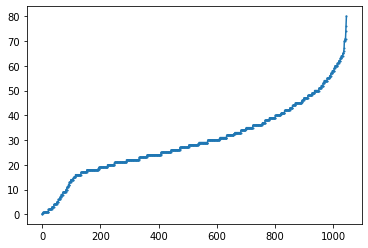

In [5]:
%matplotlib inline
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)

## Lightning notebook introduction!

 - notebooks support tab completion!  In the above cell if we typed `ax.pl<TAB>` we would get a list of possible completion
 - you can use `?` to get a function's documentation string, which is how the function is documented inside the source code.

In [7]:
ax.plot?

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 